# 00 – Master Data Pipeline

**This is the master notebook to regenerate all data artifacts from scratch.**

Running this notebook in its entirety will:
1.  Download the required raw data (`01_data_download`, `01b_sgmc_fetch`).
2.  Create the authoritative geospatial grid (`02_feature_engineering`).
3.  Generate grid-aligned labels from MRDS data (`02a_labels_from_mrds`).
4.  Generate all grid-aligned feature sets (geology, gravity, geochem, magnetics).
5.  Execute the `precompute_predictions.py` script to create the final RF and Bayesian model outputs for the Streamlit app.

After running this, the `app_v2.py` Streamlit application will be fully populated with precomputed data and ready to run without any live training.


In [2]:
# Step 1: Install dependencies
%pip install -q -r ../requirements.txt


Note: you may need to restart the kernel to use updated packages.


## Step 2: Run Data Generation Notebooks

The following cells use `%run` to execute the data processing notebooks in sequence.


--- Running 01_data_download ---


c:\Users\angel\.ai-navigator\micromamba\envs\cpu\Lib\site-packages\nbformat\__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Loaded MRDS rows: 12907 for state Missouri

--- Running 01b_sgmc_fetch ---


c:\Users\angel\.ai-navigator\micromamba\envs\cpu\Lib\site-packages\nbformat\__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Note: you may need to restart the kernel to use updated packages.
Using bbox: (np.float64(-95.97858), np.float64(36.14839), np.float64(-89.12676), np.float64(40.58562))
Querying: https://gis.dnr.mo.gov/host/rest/services/geology/surficial_geology/MapServer/0/query
Fetched polygons: 439
Saved to data/raw/state_geology.gpkg

--- Running 02_feature_engineering (Grid Creation) ---


c:\Users\angel\.ai-navigator\micromamba\envs\cpu\Lib\site-packages\nbformat\__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Note: you may need to restart the kernel to use updated packages.
Saved polygon-masked grid to c:\Users\angel\ore-exploration-ml\ore-exploration-ml\data\processed\grid_gdf.joblib with 7646 cells
Saved data/processed/X_coords.npy (7646, 2)

--- Running 02a_labels_from_mrds (Label Generation) ---


c:\Users\angel\ore-exploration-ml\ore-exploration-ml\src\features.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = grid.geometry.centroid


Loaded grid from c:\Users\angel\ore-exploration-ml\ore-exploration-ml\data\processed\grid_gdf.joblib with 7646 cells


C:\Users\angel\AppData\Local\Temp\ipykernel_69372\1494638738.py:3: DtypeWarning: Columns (3,17,25,26,28,34,35,37,39,41,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  mrds = pd.read_csv(MRDS_CSV)


MRDS rows (raw): 304632
MRDS rows (with valid coords): 304613
MRDS rows after critical filter (4 commodities): 127595
MRDS points inside state polygon: 1088
Saved filtered critical points to mrds_critical_points.gpkg

No MRDS sites found for 'CU'. Saving all-zero labels.

--- CU ---
Found 0 sites.
Positive cells: 0 of 7646 (0.0000)
Saved labels to: y_labels_cu.npy

--- NI ---
Found 70 sites.
Positive cells: 42 of 7646 (0.0055)
Saved labels to: y_labels_ni.npy

--- CO ---
Found 1002 sites.
Positive cells: 621 of 7646 (0.0812)
Saved labels to: y_labels_co.npy

--- LI ---
Found 70 sites.
Positive cells: 50 of 7646 (0.0065)
Saved labels to: y_labels_li.npy

--- Label Generation Summary ---
  mineral  n_sites  n_positive_cells  positive_rate
0      cu        0                 0       0.000000
1      ni       70                42       0.005493
2      co     1002               621       0.081219
3      li       70                50       0.006539
MRDS points inside state polygon: 1088
Saved 

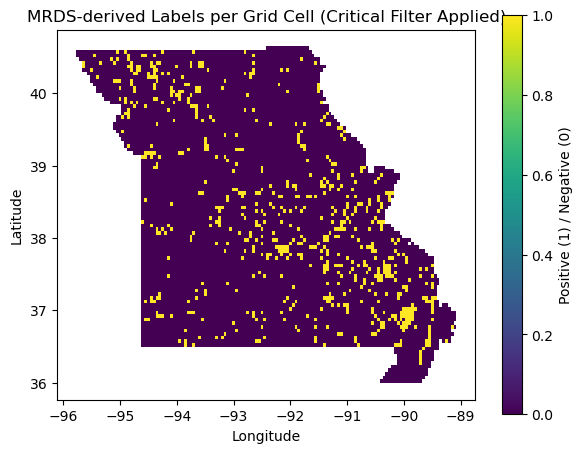

,n_cells,n_pos,pos_rate,filter_critical,critical_set
0,7646,666,0.087104,True,"CO,CU,LI,NI"


Saved c:\Users\angel\ore-exploration-ml\ore-exploration-ml\figures\labels_summary.png and c:\Users\angel\ore-exploration-ml\ore-exploration-ml\figures\labels_summary.csv

--- Running 02b_geology_features ---


c:\Users\angel\.ai-navigator\micromamba\envs\cpu\Lib\site-packages\nbformat\__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Note: you may need to restart the kernel to use updated packages.


C:\Users\angel\AppData\Local\Temp\ipykernel_69372\2652008458.py:46: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid_union = grid.unary_union.buffer(0)


Geology polygons within grid footprint: 439
Grid rows: 7646 | X_geo rows: 7646 | cols: 18
Saved geology features to data/processed/X_geo.npy


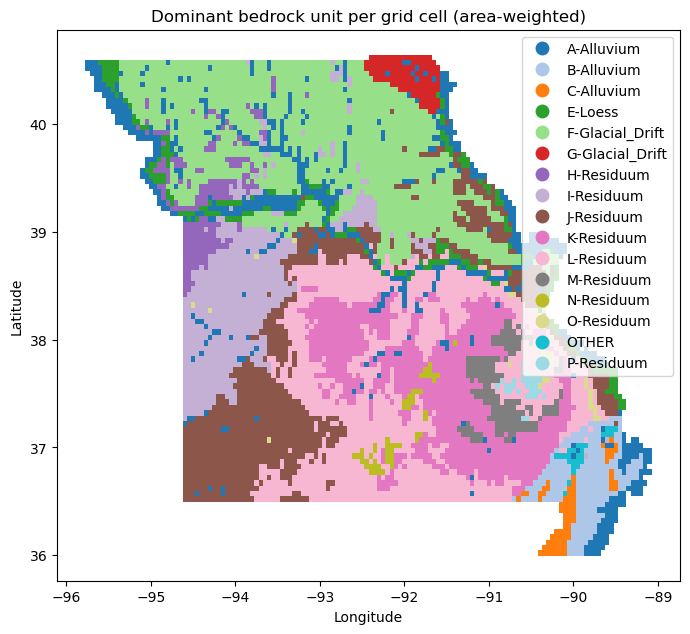

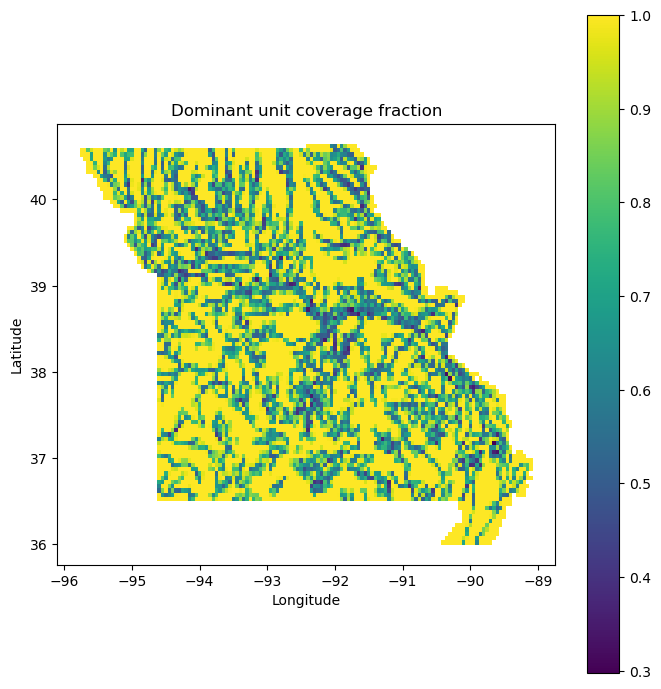

Saved geology maps → figures/geology_map_dominant.png and _domfrac.png

--- Running 02c_gravity_features ---


C:\Users\angel\AppData\Local\Temp\ipykernel_69372\2734027468.py:54: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for pt in grid.geometry.centroid:


Saved X_gravity.npy: (7646,) | X_gravity_grad.npy: (7646,)


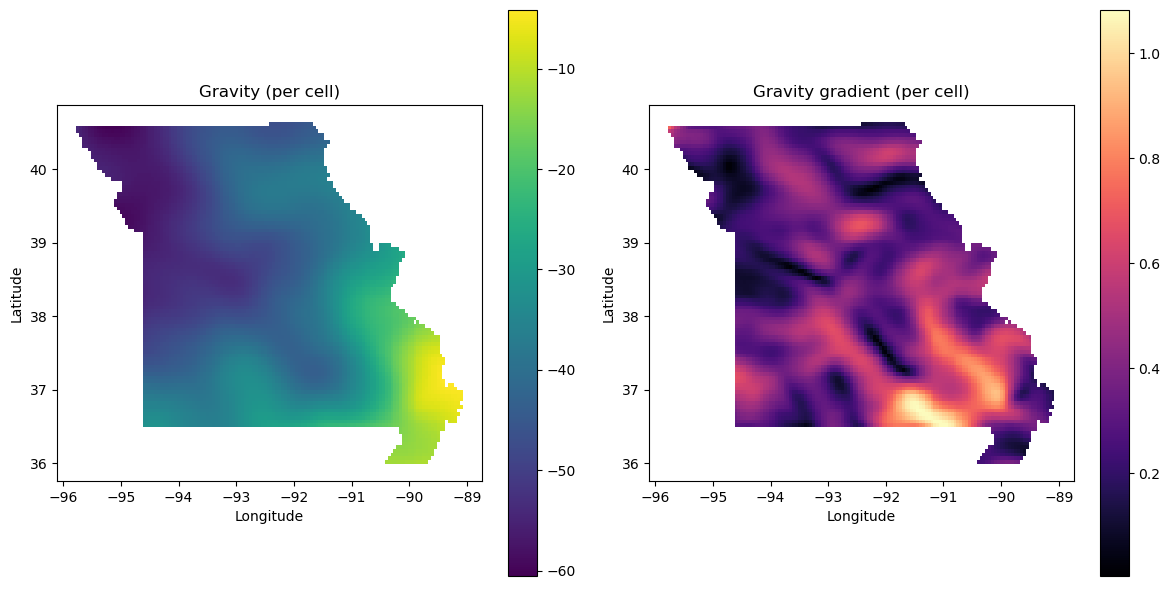

Saved figures/gravity_maps.png

--- Running 02d_geochem_features ---
Grid cells: 7646
Querying NGS within bbox: [-95.77435509  35.99560302 -89.07435509  40.64560302]
Fetched NGS points: 929


,OBJECTID,REC_NO,LABNO,LABNO2,PREV_LABNO,FLDNAM,COLL_DATE,FLDNAM_AN,DESCRIPT,AOV_CODE,...,W_NURE,Y_NURE,YB_NURE,ZN_NURE,ZR_NURE,U_NURE,NURE_METH,ZIP3,CONGDIST,geometry
0,1,5260237,BQ11-303,,,MOSH025S1,282182400000,MOSH025,NURE sample,,...,0,0,0.0,0.0,0.0,4.0,"SR1, SR2",654,2908C2,POINT (-91.44231 36.98731)
1,2,5260242,BQ11-305,,,MOSH030S1,282268800000,MOSH030,NURE sample,,...,0,0,5.0,0.0,0.0,4.0,"SR1, SR2",654,2908C2,POINT (-91.38711 36.92851)
2,3,5260192,BQ11-310,,,MORI060S1,267926400000,MORI060D,NURE sample,R1,...,0,0,0.0,0.0,0.0,4.8,"SR1, SR2",639,2908C2,POINT (-91.00821 36.55381)
3,4,5260183,BQ11-312,,,MORI051S1,267926400000,MORI051D,NURE sample,R1,...,0,0,3.0,0.0,0.0,3.2,"SR1, SR2",639,2908C2,POINT (-90.76291 36.65211)
4,5,5260234,BQ11-313,,,MOSH014S1,282009600000,MOSH014D,NURE sample,R1,...,0,0,-1.2,0.0,0.0,3.5,"SR1, SR2",654,2908C2,POINT (-91.59401 36.91181)


Saved data/processed/X_geochem.npy (7646, 8)
Saved data/processed/feature_names_geochem.json 8 cols


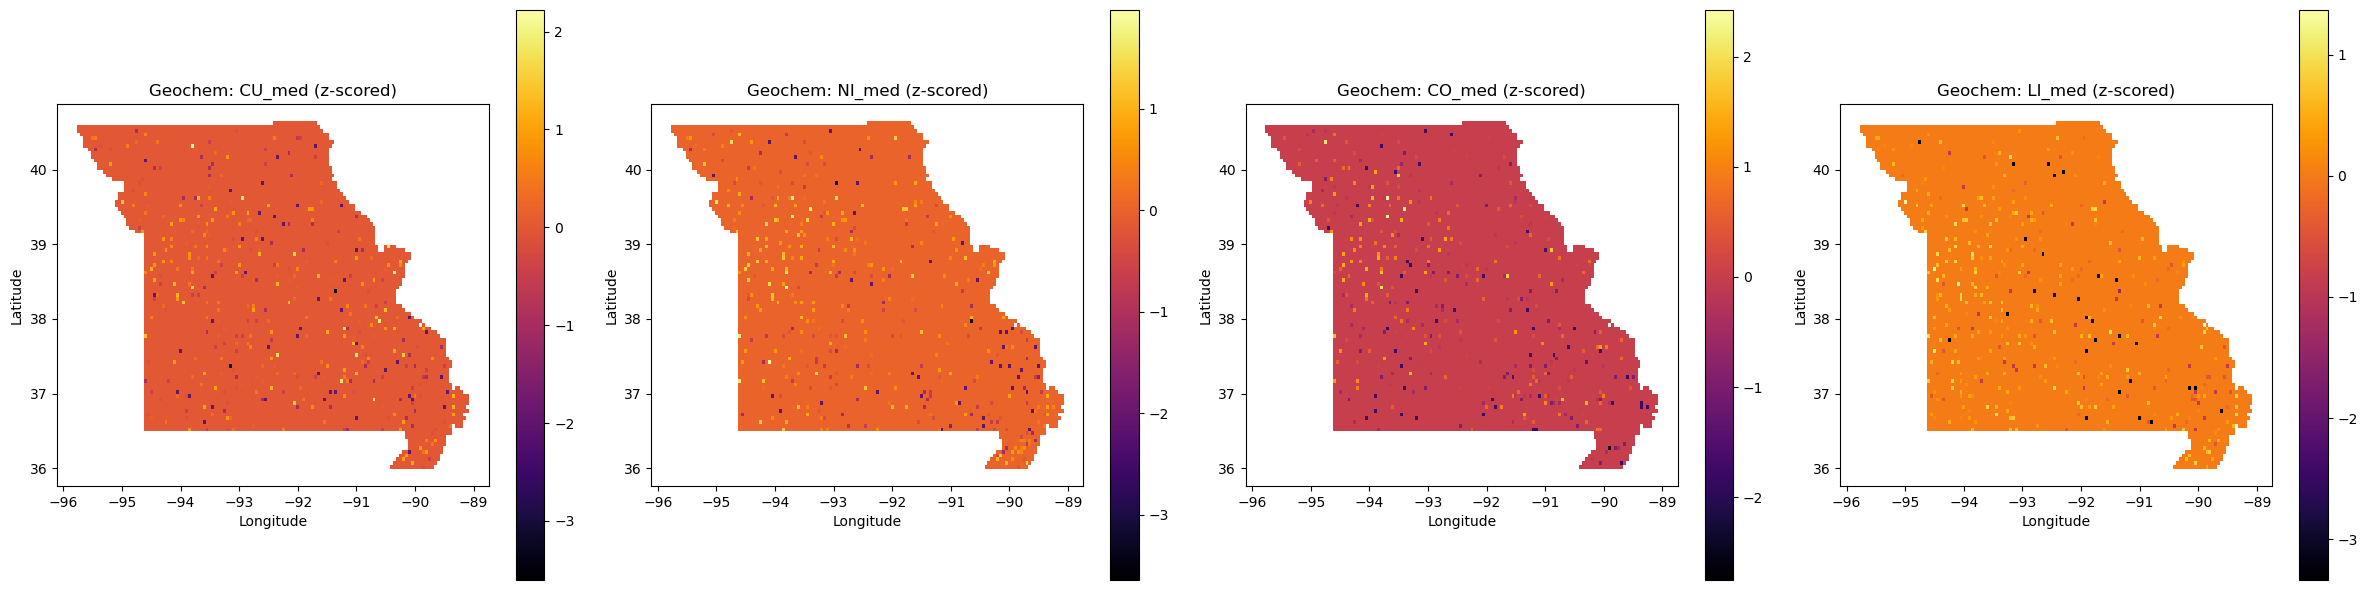

Saved figures/geochem_maps.png

--- Running 2e_magnetic_features ---
Grid cells: 7646
Input raster: c:\Users\angel\ore-exploration-ml\ore-exploration-ml\data\raw\mag_conus.tif
Grid bbox: [-95.77435509  35.99560302 -89.07435509  40.64560302]
SRC CRS: GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
SRC bounds: BoundingBox(left=-187.454155, bottom=24.619315000000007, right=-52.674754999999976, top=82.44617500000001)
SRC nodata: -3.4028234663852886e+38
Wrote clipped raster: c:\Users\angel\ore-exploration-ml\ore-exploration-ml\data\raw\mag_mo.tif | shape: (1, 559, 806)
Clipped min/max (raw): -3.4028235e+38 1554.7545
Sampled per-cell values — shape: (7646,) | min/max: -543.9879150390625 1527.9171142578125
HGM min/max: 0.1330750584602356 374.8226013183594
Tilt min/max: -1.5214897394180298 1.534900426864624
Pct NODATA in cl

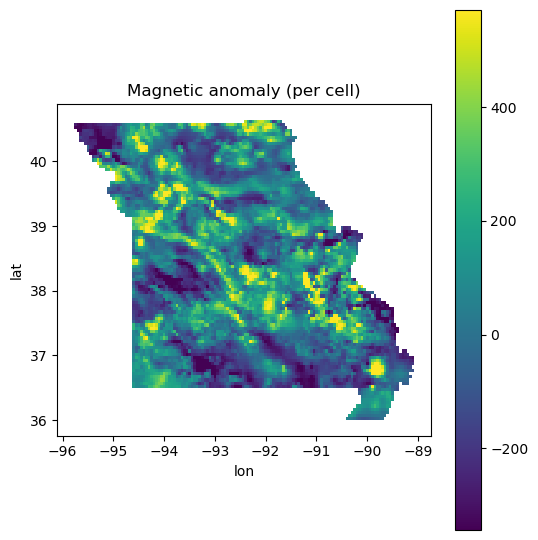

In [3]:
print("--- Running 01_data_download ---")
%run ./01_data_download.ipynb

print("\n--- Running 01b_sgmc_fetch ---")
%run ./01b_sgmc_fetch.ipynb

print("\n--- Running 02_feature_engineering (Grid Creation) ---")
%run ./02_feature_engineering.ipynb

print("\n--- Running 02a_labels_from_mrds (Label Generation) ---")
%run ./02a_labels_from_mrds.ipynb

print("\n--- Running 02b_geology_features ---")
%run ./02b_geology_features.ipynb

print("\n--- Running 02c_gravity_features ---")
%run ./02c_gravity_features.ipynb

print("\n--- Running 02d_geochem_features ---")
%run ./02d_geochem_features.ipynb

print("\n--- Running 2e_magnetic_features ---")
%run ./2e_magnetic_features.ipynb


## Step 3: Precompute Model Predictions

This final step runs the Python script that trains the RF and Bayesian models for each mineral and saves the probability arrays required by the Streamlit app.


In [1]:
# This executes the script from the 'notebooks' directory, so paths need to go up one level
# The --fast-bayes flag has been removed to enable Bayesian modeling.
%run ../scripts/precompute_predictions.py --fast-bayes


[info] Loaded grid with 7646 points.
[info] Assembling feature matrix...
[feat] Loaded X_coords.npy: (7646, 2)
[feat] Loaded X_geo.npy: (7646, 18)
[feat] Loaded X_geochem.npy: (7646, 8)
[feat] Loaded X_gravity.npy: (7646, 1)
[feat] Loaded X_gravity_grad.npy: (7646, 1)
[feat] Loaded X_mag.npy: (7646, 3)

[info] Assembled feature matrix with shape: (7646, 33)

--- Processing: NI ---
[info] RF predictions saved: rf_probs_ni.npy
[info] RF importances saved: rf_importances_ni.csv
[info] Skipping Bayesian model (--fast-bayes mode).


C:\Users\angel\ore-exploration-ml\ore-exploration-ml\scripts\precompute_predictions.py:194: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = grid.geometry.centroid


[info] Shortlist saved: targets_ni.csv (10 rows)

--- Processing: CO ---
[info] RF predictions saved: rf_probs_co.npy
[info] RF importances saved: rf_importances_co.csv
[info] Skipping Bayesian model (--fast-bayes mode).
[info] Shortlist saved: targets_co.csv (10 rows)

--- Processing: LI ---


C:\Users\angel\ore-exploration-ml\ore-exploration-ml\scripts\precompute_predictions.py:194: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = grid.geometry.centroid


[info] RF predictions saved: rf_probs_li.npy
[info] RF importances saved: rf_importances_li.csv
[info] Skipping Bayesian model (--fast-bayes mode).
[info] Shortlist saved: targets_li.csv (10 rows)

--- Processing: CU ---
[warn] Too few positive samples (0) for calibrated CV. Using uncalibrated RF probabilities.
[warn] Model for was trained on only one class. Predicting all zeros.
[info] RF predictions saved: rf_probs_cu.npy
[info] RF importances saved: rf_importances_cu.csv
[info] Skipping Bayesian model (--fast-bayes mode).
[info] Shortlist saved: targets_cu.csv (10 rows)

--- Processing: CRIT ---


C:\Users\angel\ore-exploration-ml\ore-exploration-ml\scripts\precompute_predictions.py:194: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = grid.geometry.centroid
C:\Users\angel\ore-exploration-ml\ore-exploration-ml\scripts\precompute_predictions.py:194: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = grid.geometry.centroid


[info] RF predictions saved: rf_probs_crit.npy
[info] RF importances saved: rf_importances_crit.csv
[info] Skipping Bayesian model (--fast-bayes mode).
[info] Shortlist saved: targets_crit.csv (10 rows)

--- Summary of Results ---
  mineral    rf_auc     rf_pr  bayes_auc  bayes_pr  samples  seconds
0      ni  0.987214  0.256254        NaN       NaN     7646    1.164
1      co  0.938017  0.712538        NaN       NaN     7646    0.787
2      li  0.987638  0.351633        NaN       NaN     7646    0.629
3      cu  0.000000  0.000000        NaN       NaN     7646    0.116
4    crit  0.937145  0.769684        NaN       NaN     7646    0.665


C:\Users\angel\ore-exploration-ml\ore-exploration-ml\scripts\precompute_predictions.py:194: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = grid.geometry.centroid
